In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv 
import pandas as pd
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier



percentualTreinamento = 0.7


dataset = {}
# Define the numeric labels to filter
labels={'M','B'}
labels_list = list(labels)


# Define column names based on dataset documentation
columns = [
    "ID", "Diagnosis",
    "Radius_mean", "Texture_mean", "Perimeter_mean", "Area_mean", "Smoothness_mean",
    "Compactness_mean", "Concavity_mean", "Concave_points_mean", "Symmetry_mean", "Fractal_dimension_mean",
    "Radius_se", "Texture_se", "Perimeter_se", "Area_se", "Smoothness_se",
    "Compactness_se", "Concavity_se", "Concave_points_se", "Symmetry_se", "Fractal_dimension_se",
    "Radius_worst", "Texture_worst", "Perimeter_worst", "Area_worst", "Smoothness_worst",
    "Compactness_worst", "Concavity_worst", "Concave_points_worst", "Symmetry_worst", "Fractal_dimension_worst"
]

# Load the dataset
dadosBrutos = pd.read_csv("../dataset/wdbc.data", names=columns, header=None)

# Drop the ID column (not useful for analysis)
dadosBrutos.drop(columns=["ID"], inplace=True)


# Filter rows where a column equals one of the labels
dadosBrutosLabel0 = dadosBrutos[dadosBrutos['Diagnosis'] == labels_list[0]] 
dadosBrutosLabel1 = dadosBrutos[dadosBrutos['Diagnosis'] == labels_list[1]] 

# metadata 
#print(dadosBrutos.head())



In [2]:
# Total number of samples

nAmostras_treinamento0 = len(dadosBrutosLabel0)
tamanhoTreinamento0 = int(nAmostras_treinamento0 * percentualTreinamento)

# Randomly select indices for group 1 - treinamento
indices_label0_treinamento = np.random.choice(dadosBrutosLabel0.index, size=tamanhoTreinamento0, replace=False)
# Select remaining indices for group 1 - teste
indices_label0_teste = dadosBrutosLabel0.index.difference(indices_label0_treinamento)

# Determine the size of group 2
nAmostras_treinamento1 = len(dadosBrutosLabel1)
tamanhoTreinamento1 = int(nAmostras_treinamento1 * percentualTreinamento)

# Randomly select indices for group 2 - treinamento
indices_label1_treinamento = np.random.choice(dadosBrutosLabel1.index, size=tamanhoTreinamento1, replace=False)
indices_label1_teste = dadosBrutosLabel0.index.difference(indices_label1_treinamento)

trainData = dadosBrutosLabel0.loc[indices_label0_treinamento]
buffer_trainData = dadosBrutosLabel1.loc[indices_label1_treinamento]
testData = dadosBrutosLabel0.loc[indices_label0_teste]
buffer_testData = dadosBrutosLabel1.loc[indices_label1_treinamento]

filtered_rows_Train = pd.concat([trainData,buffer_trainData], axis=0)
filtered_rows_Test = pd.concat([testData,buffer_testData], axis=0)

trainData = filtered_rows_Train.iloc[:, 1:31].to_numpy()
trainLabels= filtered_rows_Train.iloc[:, 0]
testData = filtered_rows_Test.iloc[:, 1:31].to_numpy()
testLabels= filtered_rows_Test.iloc[:, 0]

# aleatoriza ordem de treinamento
#indicesShuffledTranData = np.random.choice(trainData.index, size=1, replace=False)
#trainData = trainData.loc[indicesShuffledTranData]
#trainLabels = trainLabels.loc[indicesShuffledTranData]


trainLabels = trainLabels.replace({labels_list[0]: 0, labels_list[1]: 1}).to_numpy()
testLabels = testLabels.replace({labels_list[0]: 0, labels_list[1]: 1}) .to_numpy()

print(trainLabels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/tmp/ipykernel_7670/392804951.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trainLabels = trainLabels.replace({labels_list[0]: 0, labels_list[1]: 1}).to_numpy()
/tmp/ipykernel_7670/392804951.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  testLabels = testLabels.replace({labels_list[0]: 0, labels_list[1]: 1}) .to_numpy()


## Loop Principal

In [3]:
import statistics
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


percentualErrosMaximo=0.3
stepErros=0.005

vector = np.arange(0, percentualErrosMaximo, stepErros)
print("Blocos de erro entrada: ", vector)


classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators = 15), # n_estimators =100
    "SVM (RBF)": SVC(C=100,kernel='rbf', gamma=0.001,class_weight='balanced'),
    "XGBoost": XGBClassifier(n_estimators = 20, objective = 'binary:logistic', tree_method = 'hist', eta = 0.1, # n_estimators = 100
                             max_depth = 3, enable_categorical = True),
    "MLP": MLPClassifier(hidden_layer_sizes=(50), activation='tanh', solver='sgd', max_iter=500, alpha=0.001, random_state = 42)
    # "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, class_weight="balanced"),
    # "SVM (RBF)": SVC(C=10, kernel='rbf', gamma=0.01, class_weight='balanced', probability=True),
    # "XGBoost": xgb.XGBClassifier(n_estimators=50, max_depth=4, learning_rate=0.1, tree_method='hist', use_label_encoder=False, eval_metric='logloss'),
    # "MLP": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, alpha=0.001)
}
# MLPClassifier(hidden_layer_sizes=(50), activation='tanh', solver='lbfgs',
                    #max_iter=3000, alpha=0.001)

nRepeticoes=10
resultadosConsolidados_treino = []
resultadosConsolidados_teste = []
blocos = []
all_results=[]
resultadosAcc=[]


for nivelRuidoAtual in tqdm(vector):
    for indiceRepeticao in range(nRepeticoes):
        # Total number of samples

        dadosBrutosLabel0 = dadosBrutos[dadosBrutos['Diagnosis'] == labels_list[0]] 
        dadosBrutosLabel1 = dadosBrutos[dadosBrutos['Diagnosis'] == labels_list[1]] 

        nAmostras_treinamento0 = len(dadosBrutosLabel0)
        tamanhoTreinamento0 = int(nAmostras_treinamento0 * percentualTreinamento)
        tamanhoErroTreinamento0 = int(nAmostras_treinamento0 * (nivelRuidoAtual/2) )

        # Randomly select indices for group 1 - treinamento
        indices_label0_treinamento = np.random.choice(dadosBrutosLabel0.index, size=tamanhoTreinamento0, replace=False)
        indices_label0_erro =np.random.choice(indices_label0_treinamento, size=tamanhoErroTreinamento0, replace=False)

        # Select remaining indices for group 1 - teste
        indices_label0_teste = dadosBrutosLabel0.index.difference(indices_label0_treinamento)

        # Determine the size of group 2
        nAmostras_treinamento1 = len(dadosBrutosLabel1)
        tamanhoTreinamento1 = int(nAmostras_treinamento1 * percentualTreinamento)
        tamanhoErroTreinamento1 = int(nAmostras_treinamento0 * (nivelRuidoAtual/2) )

        # Randomly select indices for group 2 - treinamento
        indices_label1_treinamento = np.random.choice(dadosBrutosLabel1.index, size=tamanhoTreinamento1, replace=False)
        indices_label1_teste = dadosBrutosLabel0.index.difference(indices_label1_treinamento)
        indices_label1_erro =np.random.choice(indices_label1_treinamento, size=tamanhoErroTreinamento1, replace=False)

        # Introduz erro
        dadosLabel0=dadosBrutosLabel0
        dadosLabel1=dadosBrutosLabel1

        # Introduzindo erro com base no nível de ruído normal
        dadosLabel0.loc[indices_label0_erro, "Diagnosis"] = dadosLabel0.loc[indices_label0_erro, "Diagnosis"].map({"M": "B", "B": "M"})
        dadosLabel1.loc[indices_label1_erro, "Diagnosis"] = dadosLabel1.loc[indices_label1_erro, "Diagnosis"].map({"M": "B", "B": "M"})

        trainData = dadosLabel0.loc[indices_label0_treinamento]
        buffer_trainData = dadosLabel1.loc[indices_label1_treinamento]
        testData = dadosLabel0.loc[indices_label0_teste]
        buffer_testData = dadosLabel1.loc[indices_label1_treinamento]

        filtered_rows_Train = pd.concat([trainData,buffer_trainData], axis=0)
        filtered_rows_Test = pd.concat([testData,buffer_testData], axis=0)

        #aleatoriza ordem de treinamento
        indicesShuffledTranData = np.random.choice(filtered_rows_Train.index, size=1, replace=False)
        trainData = filtered_rows_Train.loc[indicesShuffledTranData]
        trainLabels = filtered_rows_Train.loc[indicesShuffledTranData]


        trainData = filtered_rows_Train.iloc[:, 1:31]
        trainLabels= filtered_rows_Train.iloc[:, 0]
        testData = filtered_rows_Test.iloc[:, 1:31]
        testLabels= filtered_rows_Test.iloc[:, 0]


        trainLabels = filtered_rows_Train.loc[:, "Diagnosis"].map({"M": 0, "B": 1}).to_numpy()
        testLabels = filtered_rows_Test.loc[:, "Diagnosis"].map({"M": 0, "B": 1}).to_numpy()
          
        # Calcula o nivel de ruido real baseado no número de indices flipados divididio pelo numero total de indices 
        nivelRuidoAtual_real=round((len(indices_label0_erro)+len(indices_label1_erro))/len(trainLabels), 4)
        
        ### Treinamentos
        for name, model in classifiers.items():
            model.fit(trainData, trainLabels)
            resultadoTreinamento=model.predict(trainData)
            resultadoTeste=model.predict(testData)
            acc_teste = ( sum((testLabels==resultadoTeste))/len(testLabels) )
            resultadosAcc.append([nivelRuidoAtual_real, name, indiceRepeticao,acc_teste])
            for true_label, pred_label in zip(resultadoTeste, testLabels):
                all_results.append([nivelRuidoAtual_real, name, indiceRepeticao, true_label, pred_label, acc_teste])



df_results = pd.DataFrame(all_results, columns=["Noise Level", "Classifier", "IndexRep", "True Label", "Predicted Label", "Accuracy"])
resultadosExp = pd.DataFrame(resultadosAcc, columns=["Noise Level", "Classifier", "IndexRep", "Accuracy"])


Blocos de erro entrada:  [0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295]


100%|███████████████████████████████████████████| 60/60 [01:09<00:00,  1.16s/it]


In [8]:
import os
string = "estudo_piloto.csv" 
if not os.path.exists(string):
    resultadosExp.to_csv(string, index=True)

---
## Plot Estudo Piloto:

In [46]:
resultadosExp['Noise Level'].unique()

array([0.    , 0.005 , 0.0101, 0.0151, 0.0202, 0.0252, 0.0302, 0.0353,
       0.0403, 0.0453, 0.0504, 0.0554, 0.0605, 0.0655, 0.0705, 0.0756,
       0.0806, 0.0856, 0.0907, 0.0957, 0.1008, 0.1058, 0.1108, 0.1159,
       0.1209, 0.1259, 0.131 , 0.136 , 0.1411, 0.1461, 0.1511, 0.1562,
       0.1612, 0.1662, 0.1713, 0.1763, 0.1814, 0.1864, 0.1914, 0.1965,
       0.2015, 0.2065, 0.2116, 0.2166, 0.2217, 0.2267, 0.2317, 0.2368,
       0.2418, 0.2469, 0.2519, 0.2569, 0.262 ])

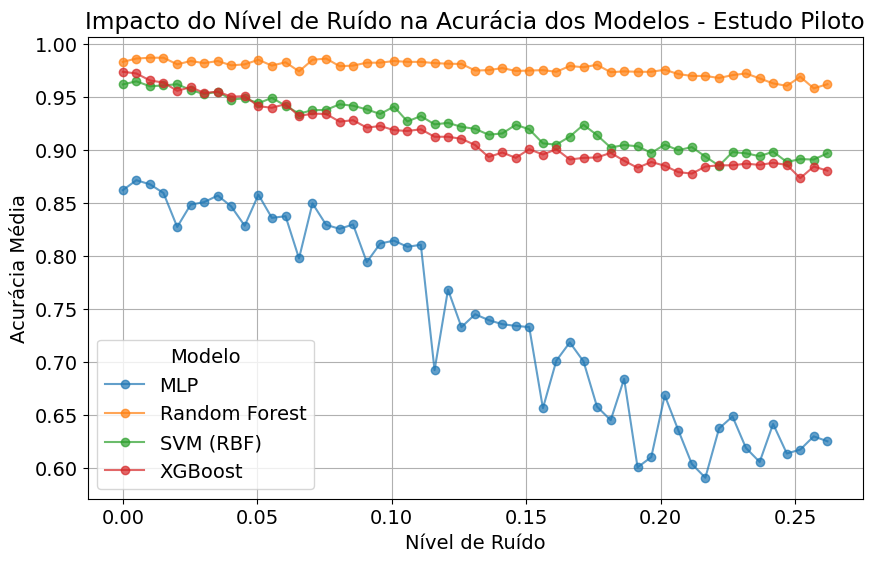

In [31]:
resultadosExp = pd.read_csv('estudo_piloto.csv', index_col = 0)
df_mean_accuracy = resultadosExp.groupby(['Noise Level', 'Classifier'])['Accuracy'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 14})
for classifier in df_mean_accuracy['Classifier'].unique():
    subset = df_mean_accuracy[df_mean_accuracy['Classifier'] == classifier]
    plt.plot(subset['Noise Level'], subset['Accuracy'], marker='o', linestyle='-', label=classifier, alpha=0.7)

plt.xlabel("Nível de Ruído")
plt.ylabel("Acurácia Média")
plt.title("Impacto do Nível de Ruído na Acurácia dos Modelos - Estudo Piloto")
plt.legend(title="Modelo")
plt.grid(True)
#plt.savefig('estudo_piloto.jpg')
plt.show()


In [32]:
resultadosExp.head()

,Noise Level,Classifier,IndexRep,Accuracy
0,0.0,Random Forest,0,0.988281
1,0.0,SVM (RBF),0,0.945312
2,0.0,XGBoost,0,0.968750
3,0.0,MLP,0,0.804688
4,0.0,Random Forest,1,0.972656


---
### Estimativa do número de repetições:

In [37]:
import scipy.stats as stats

media_global = resultadosExp["Accuracy"].mean()
media_bloco = resultadosExp.groupby("Noise Level")["Accuracy"].mean()

# Variância entre blocos:
Sb = (len(resultadosExp["Classifier"].unique()) * np.sum((media_bloco - media_global) ** 2) / (len(media_bloco) - 1)).item()

# Variância dentro dos blocos:
Sw = (resultadosExp.groupby("Noise Level").apply(lambda g: np.sum((g["Accuracy"] - g["Accuracy"].mean())**2)).sum()/(
           len(resultadosExp["Classifier"].unique())*(len(media_bloco) - 1))).item()

/tmp/ipykernel_7670/968962913.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Sw = (resultadosExp.groupby("Noise Level").apply(lambda g: np.sum((g["Accuracy"] - g["Accuracy"].mean()) ** 2)).sum() / (


In [40]:
# Definições do experimento
alpha, poder = 0.05, 0.8

n_classificadores = 4
n_blocos = resultadosExp['Noise Level'].nunique()

# Diferença mínima detectável (efeito desejado)
d_min = 0.05

# Graus de liberdade
df1 = n_classificadores - 1 
df2 = (n_classificadores - 1)*(n_blocos - 1)

# Valor crítico da distribuição F
F_critical = stats.f.ppf(1 - alpha, df1, df2)

# Calcular o número de repetições por bloco
repeticoes = int(np.ceil((Sb/Sw)*((df1*F_critical)/(d_min**2))))

In [41]:
repeticoes

151